# GitUp

In [1]:

!git add .
!git commit -m "EIA to ds2"
!git push

The file will have its original line endings in your working directory


[master 5c721ef] Desktop
 1 file changed, 662 insertions(+), 679 deletions(-)
 rewrite EIA_Data.ipynb (91%)


To https://github.com/thekhan314/CrudeOilApp.git
   d82f86f..5c721ef  master -> master


# Imports

In [2]:
# Libraries
import pandas as pd
import pandas as pd
import requests
import json
import functools
import sqlite3
import pprint as pp
import matplotlib.pyplot as plt

# Classes

In [3]:
class EIA_Series:
    
    eia_api_url= 'http://api.eia.gov/series/?api_key=651b30b69f4f47a13a2912d673f7da93&series_id='
    
    
    def __init__(
        self,
        name,
        id,
        desc = None
    ):
        self.name = name
        self.id = id
        self.desc = desc
        
        self.request = requests.get(self.eia_api_url+self.id)
        self.series_dict = json.loads(self.request.text)
        
    def show_response(self):
        
        pp.pprint(self.series_dict)
          
        
    def make_df(self,format='%Y%m%d',data_col='data',date_col='Date'):
        
        self.data_col = data_col
        self.date_col = date_col
        
        self.series_list=self.series_dict['series'][0][data_col]
        self.series_frame = pd.DataFrame(self.series_list)
        self.series_frame.columns=[self.date_col,self.name]     
        
        self.series_frame[self.date_col]=pd.to_datetime(
            self.series_frame[self.date_col],
            format=(format)
        )
        
        self.series_frame.set_index(
            self.date_col,drop=True,inplace=True)
            
        self.series_frame.sort_index(ascending=True,inplace=True)
        self.series_frame['delta'+self.name] = self.series_frame[self.name].diff()
        self.series_frame['rolling'+self.name] = self.series_frame[self.name].rolling(window=50).mean()

    def chart(self):
        self.fig,self.ax = plt.subplots(figsize=(10,6))
        self.ax.plot(self.series_frame)
    def report(self):
        print(
        "Earliest Point: {} \n".format(self.data.iloc[0].name),
        "Latest Point: {} \n".format(self.data.iloc[-1].name),
        ""
        )


In [4]:
class Workpiece:
    def __init__(data):
        self.orig_data = data
        
    def report (self,n_highest_counts = 10):
    ''' Returns a dataframe reporting on the value counts of input frame,
        for the top n_highest_counts values'''
    
        master={}

        for column in dataframe.columns:

            master[column]={}
            col_dict = master[column]
            col_dict['type'] = str(dataframe[column].dtypes)
            col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
            col_dict['unique values'] = dataframe[column].nunique()
            
            series1 = dataframe[column].value_counts().head(n_highest_counts)
            series1 = round((series1/len(dataframe)) * 100, 2)  
            
            x = 1

            for index,item in series1.items():
                value_prop = str(x) + 'nth_value_%'
                value_name = str(x) + 'nth_value'
                col_dict[value_name] = index
                col_dict[value_prop] = item
                x += 1

        df_report=pd.DataFrame.from_dict(master,orient='index')
        df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)

        return df_report
        
    
        
        

IndentationError: expected an indented block (<ipython-input-4-ed330f4058bd>, line 7)

In [ ]:
class Workpiece:
    def __init__(data):
        self.orig_data = data
        
    def report (self,n_highest_counts = 10):
    ''' Returns a dataframe reporting on the value counts of input frame,
    for the top n_highest_counts values'''
    
        master={}

        for column in dataframe.columns:

            master[column]={}
            col_dict = master[column]
            col_dict['type'] = str(dataframe[column].dtypes)
            col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
            col_dict['unique values'] = dataframe[column].nunique()
            
            series1 = dataframe[column].value_counts().head(n_highest_counts)
            series1 = round((series1/len(dataframe)) * 100, 2)  
            
            x = 1

            for index,item in series1.items():
                value_prop = str(x) + 'nth_value_%'
                value_name = str(x) + 'nth_value'
                col_dict[value_name] = index
                col_dict[value_prop] = item
                x += 1

        df_report=pd.DataFrame.from_dict(master,orient='index')
        df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)

        return df_report
        

# Explore Series

## Daily Spot Price

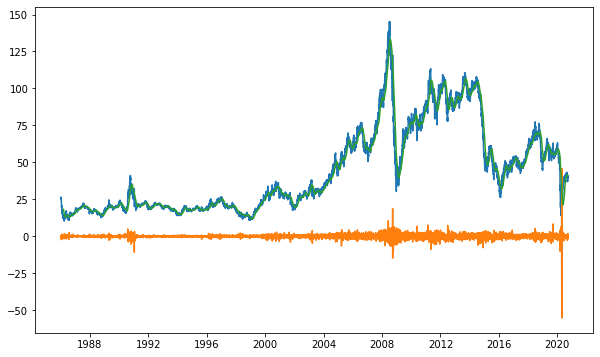

In [5]:
desc = ''

daily_price = EIA_Series('Daily Price','PET.RWTC.D')
daily_price.make_df()
daily_price.chart()

In [7]:
type(daily_price.series_frame.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
isinstance(daily_price.series_frame.index,pd.DatetimeIndex)

True

In [7]:
daily_price.series_frame['Daily Price'].describe()

count    8755.000000
mean       44.025800
std        28.965105
min       -36.980000
25%        19.770000
50%        31.510000
75%        62.915000
max       145.310000
Name: Daily Price, dtype: float64

## Daily Field Production in the US

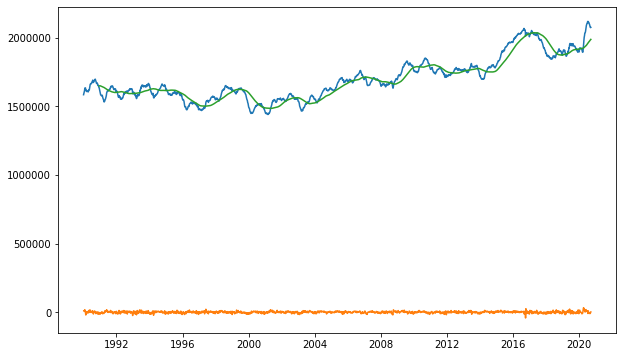

In [4]:
desc = ''

daily_production = EIA_Series('Weekly Stocks','PET.WTTSTUS1.W')
daily_production.make_df()
daily_production.chart()

In [ ]:
desc = 'US imports of crude oil, monthly'

monthly_imports = EIA_Series('Monthly Imports','PET.MCRIMUS1.M',desc )
monthly_imports.make_df('%Y%m')
monthly_imports.chart()

## Dow Jones

In [ ]:
df_dow = pd.read_csv('data/dji.csv')

df_dow['Date']=pd.to_datetime(df_dow['Date'])
        
df_dow.set_index(df_dow['Date'],drop=True,inplace=True)

In [ ]:
df_dow['Close'].plot()

In [ ]:
df_dow['delta_dow']  = df_dow['Close'].diff()

X = df_dow[['delta_dow']]

y = daily_price.series_frame[['deltaDaily Price']]

merged = y.merge(X,how='inner',left_index=True,right_index=True)

In [ ]:
merged.head()

In [ ]:
x=merged['deltaDaily Price']
y=merged['delta_dow']
plt.scatter(x=x,y=y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [ ]:
model.fit(x.reshape(-1,1),y)

# To-Do

1. Moving averages?
2. Correlation between price and:
3. Features to add/explore:
    a. Active wells?
    b. Refinery inputs?
    c. consumption?
    d. month?
    e. 
    


# SCRAPS

In [ ]:
\
df_eia=functools.reduce(lambda x,y: x.join(y,how='outer'),frame_list)
df_eia.fillna(axis=0,method='ffill',inplace=True)

conn = sqlite3.connect('oilstocks.db')
c = conn.cursor()

for col in df_eia:
    df_eia[col]=preprocessing.scale(df_eia[col])

df_eia.to_sql("scaledstocks",conn,if_exists='replace')
conn.commit()

df_eia.to_sql("crudestocks",conn,if_exists='replace')